In [3]:
import pandas as pd
import os
import sys
from src.utils import to_rgb, plot_image, normalize_img
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

#Enables imports from src directory in notebooks
sys.path.insert(0, os.path.abspath('../src'))
sys.path.insert(1, os.path.abspath('../src/data_handling'))
#Auto update imports when python files in src is updated
%load_ext autoreload
%autoreload 2

data_location = "../../kornmo-data-files/raw-data"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:

dataset_df = pd.read_csv(os.path.join(data_location, '../dataset_filtered-and-normalized.csv'))

#print(list(dataset_df.keys()))

In [3]:
dataset_df = dataset_df.filter(regex=("mean_temp.*"))
dataset_df.head()

,mean_temp0,mean_temp1,mean_temp2,mean_temp3,mean_temp4,mean_temp5,mean_temp6,mean_temp7,mean_temp8,mean_temp9,...,mean_temp173,mean_temp174,mean_temp175,mean_temp176,mean_temp177,mean_temp178,mean_temp179,mean_temp180,mean_temp181,mean_temp182
0,0.631667,0.668333,0.646667,0.630000,0.611667,0.613333,0.606667,0.641667,0.685000,0.618333,...,0.726667,0.751667,0.708333,0.781667,0.778333,0.785000,0.773333,0.766667,0.755000,0.755000
1,0.490000,0.491667,0.520000,0.563333,0.531667,0.561667,0.565000,0.571667,0.563333,0.600000,...,0.573333,0.588333,0.563333,0.610000,0.670000,0.655000,0.611667,0.595000,0.636667,0.631667
2,0.530000,0.546667,0.561667,0.568333,0.610000,0.558333,0.560000,0.531667,0.505000,0.478333,...,0.708333,0.661667,0.635000,0.616667,0.651667,0.653333,0.708333,0.721667,0.635000,0.553333
3,0.590000,0.596667,0.573333,0.590000,0.620000,0.600000,0.666667,0.618333,0.613333,0.641667,...,0.675000,0.705000,0.710000,0.731667,0.735000,0.730000,0.733333,0.731667,0.711667,0.713333
4,0.515000,0.505000,0.511667,0.546667,0.558333,0.570000,0.560000,0.575000,0.571667,0.576667,...,0.730000,0.718333,0.710000,0.678333,0.686667,0.745000,0.703333,0.673333,0.691667,0.710000


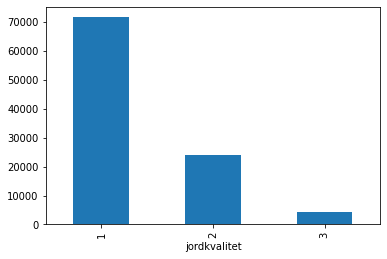

In [4]:
from utils import plot_bar
soilqdf = pd.read_csv(os.path.join(data_location, 'soil-data/soilquality.csv'), nrows=100000)
soilqrdf = pd.read_csv(os.path.join(data_location, 'soil-data/soilquality_refined.csv'))

plot_bar(soilqdf, 'jordkvalitet')


In [5]:
from satellite_images import read_images
sat_images = read_images('sentinel_100x100_1.h5', 10)


100%|██████████| 10/10 [00:01<00:00,  8.32it/s]


In [47]:


test_orgnr = '870256582'


#print(list(sat_images.keys()))
org = sat_images[test_orgnr]
#print(list(org.keys()))
images = org['2018']
#print(images.shape)
img = images[18]
img = to_rgb(img, normalize=True)
plot_image(img)



#plt.imsave(test_orgnr + '.png', img)
w = h = 15
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i in range(0, columns*rows):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(to_rgb(images[i]))
plt.show()


NameError: name 'sat_images' is not defined

In [ ]:
import h5py
from tqdm import tqdm

sat1_dict = {}
sat0_dict = {}
with h5py.File(os.path.join('E:/MasterThesisData/Satellite_Images', 'sentinel_100x100_1.h5'), "r") as f:
        images = f['images']
        org_number_sat1 = list(images.keys())
        for orgnr in tqdm(org_number_sat1):
                sat1_dict[orgnr] = len(images[orgnr].keys())
with h5py.File(os.path.join('E:/MasterThesisData/Satellite_Images', 'sentinel_100x100_0.h5'), "r") as f:
        images = f['images']
        org_number_sat0 = list(images.keys())
        for orgnr in tqdm(org_number_sat0):
                sat0_dict[orgnr] = len(images[orgnr].keys())

print(len(org_number_sat1))
print(len(org_number_sat0))

in_first = set(org_number_sat1)
in_second = set(org_number_sat0)

in_second_but_not_in_first = in_second - in_first

result = org_number_sat1 + list(in_second_but_not_in_first)
print(len(set(result)))
        


100%|██████████| 4135/4135 [00:31<00:00, 130.52it/s]

3477
4135
7132


In [ ]:
print('970391959' in result)

True


In [ ]:
matrikkel = pd.read_csv(os.path.join(data_location, 'farm-information/farmer_elevation.csv'), delimiter=',')
columns_to_keep = ['orgnr', 'lat', 'lng']
matrikkel = matrikkel.filter(columns_to_keep)
matrikkel['orgnr'] = matrikkel['orgnr'].astype(str)
matrikkel['lat'] = matrikkel['lat'].astype(float)
matrikkel['lng'] = matrikkel['lng'].astype(float)
print(matrikkel.shape)
matrikkel.head()


In [ ]:
from utils import boundingBox

row = matrikkel.loc[matrikkel['orgnr'] == test_orgnr].iloc[0]
print(row)
bounding_box = boundingBox(row['lat'], row['lng'], 1)
print(bounding_box)



NameError: name 'matrikkel' is not defined

In [ ]:
from osgeo import gdal
from osgeo import osr
import rasterio

dataset = rasterio.open(test_orgnr + '.png', 'r')
bands = [1, 2, 3]
data = dataset.read(bands)
transform = rasterio.transform.from_bounds(bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3], data.shape[1], data.shape[2])
crs = {'init': 'epsg:4326'}

with rasterio.open(test_orgnr + '.tif', 'w', driver='GTiff',
                   width=data.shape[1], height=data.shape[2],
                   count=3, dtype=data.dtype, nodata=0,
                   transform=transform, crs=crs) as dst:
    dst.write(data, indexes=bands)

In [ ]:
import geopandas as gpd

soilquality_path = "E:/Universitetet i Agder/Mikkel Andreas Kvande - kornmo-data-files/raw-data/soil-data"

soilquality = gpd.read_file(os.path.join(soilquality_path, 'soil-quality.gdb'), driver='FileGDB', layer=0)
soilquality = soilquality.dropna()
soilquality.head()

In [ ]:
from shapely.geometry import box, mapping, Polygon
import matplotlib.pyplot as plt


polygons = soilquality['geometry']
polygon = Polygon(list(mapping(polygons.iloc[0])['coordinates'][0][0]))
box = box(bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3])
print(box)
polygon2 = Polygon([(10.20, 63.26), (10.21, 63.26), (10.20, 63.27)])
print(box.intersects(polygon2))

plt.plot(*polygon2.exterior.xy)
plt.plot(*box.exterior.xy)


In [ ]:
import geopandas as gpd
from shapely import wkt

df = pd.read_csv(os.path.join(data_location, 'soil-data/jordsmonn_geometry.csv'), nrows=1000, dtype=str)
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
print(type(gdf.iloc[0]['geometry']))

NameError: name 'data_location' is not defined

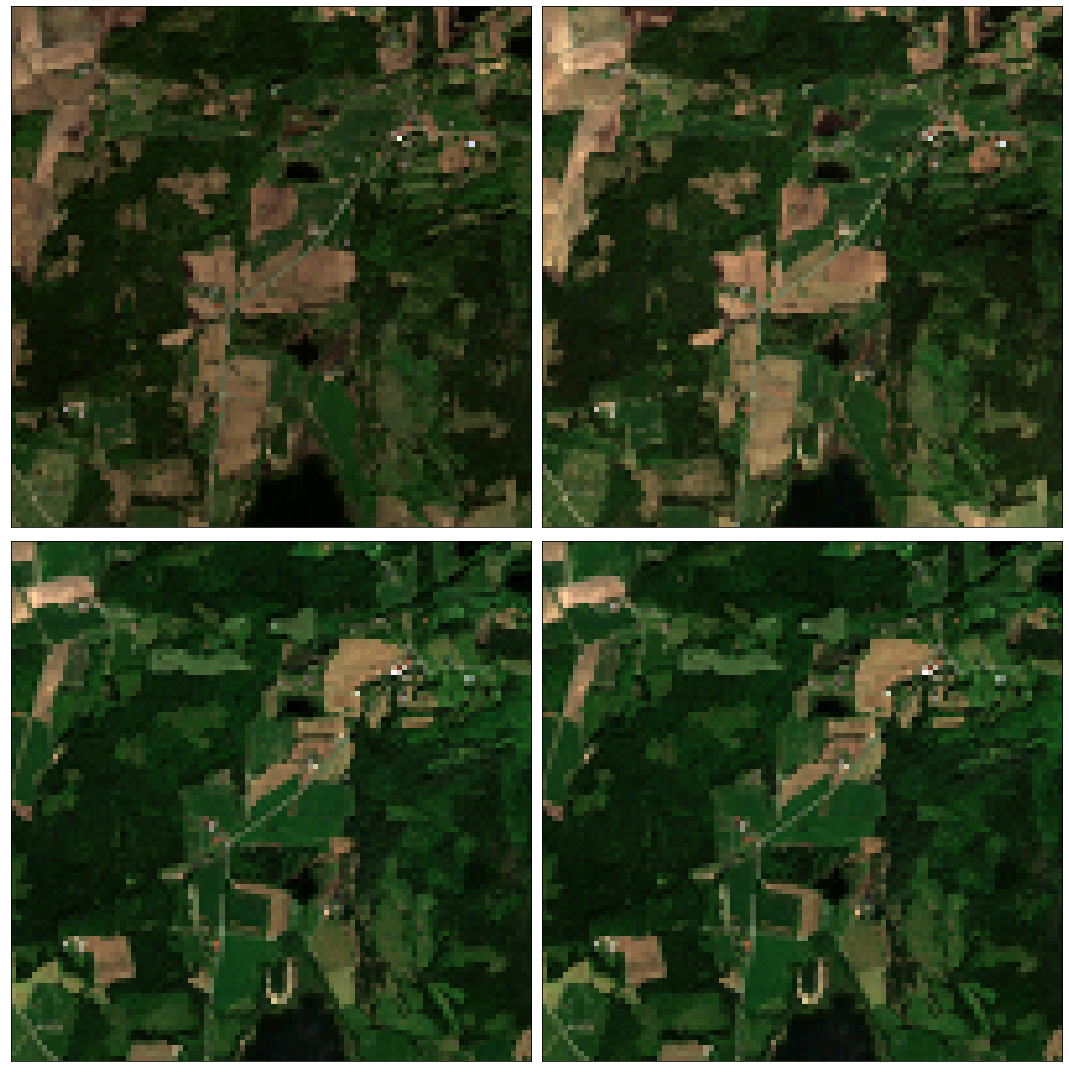

In [25]:
from src.satellite_images.satellite_images import get_images_by_orgnr

images = get_images_by_orgnr('970391959')

images = images['2017']

# plot_image(to_rgb(images[12]))
# plt.imsave('970391959.png', to_rgb(images[12]))
w = h = 15
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(2, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(to_rgb(images[11]))
fig.add_subplot(2, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(to_rgb(images[12]))
fig.add_subplot(2, 2, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(to_rgb(images[16]))
fig.add_subplot(2, 2, 4)
plt.xticks([])
plt.yticks([])
plt.imshow(to_rgb(images[17]))
fig.tight_layout()

plt.show()


In [ ]:
w = h = 15
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i in range(0, columns*rows):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(to_rgb(images[i]))
plt.show()

In [ ]:
farmer_elevation = pd.read_csv(os.path.join(data_location, 'farm-information/farm-properties/centroid_coordinates.csv'),dtype=str ,float_precision='round_trip')
farmer_elevation.head()



NameError: name 'data_location' is not defined

In [ ]:
from utils import plot_bar

farmer_elevation = farmer_elevation.filter(['orgnr', 'kommunenr', 'longitude', 'latitude'])
print(farmer_elevation.loc[farmer_elevation['longitude'] == '10.002102149405633'])

farmer_elevation['latlng'] = farmer_elevation[farmer_elevation.columns[2:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
farmer_elevation_new = farmer_elevation.drop(columns=['longitude', 'latitude'])
farmer_elevation_new = farmer_elevation.dropna()

grp = farmer_elevation_new.groupby('latlng').count()
grp = grp.loc[grp['orgnr'] > 2]
print(grp)


# 911738252
# 970398619
# 989774484 

          orgnr kommunenr           longitude           latitude
8058  986653414       625  10.002102149405633  59.81217485684528
8059  990633576       625  10.002102149405633  59.81217485684528
                                       orgnr  kommunenr  longitude  latitude
latlng                                                                      
10.952587017488861,60.664085301916565      3          3          3         3
11.228939869350762,60.73982690565025       3          3          3         3


In [ ]:
import fiona
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

print(fiona.listlayers('../disponerte_eiendommer.gpkg'))

disp_eien = gpd.read_file("../disponerte_eiendommer.gpkg", layer='disponerte_eiendommer')

disp_eien.shape
disp_eien.head()


['disponerte_eiendommer']


,orgnr,year,geometry
0,969102404,2017,"MULTIPOLYGON (((199287.149 6584342.538, 199295..."
1,983375782,2017,"MULTIPOLYGON (((284208.764 6624834.683, 284208..."
2,969924358,2017,"MULTIPOLYGON (((284560.510 6687767.290, 284558..."
3,983375782,2019,"MULTIPOLYGON (((284208.764 6624834.683, 284208..."
4,869249572,2019,"MULTIPOLYGON (((170263.991 6598866.505, 170261..."


In [ ]:
orgnrs = disp_eien['orgnr']

print(len(orgnrs))
print(len(set(orgnrs)))

print(disp_eien.loc[disp_eien['orgnr'] == 869249572])

26188
10154
       orgnr  year                                           geometry
4  869249572  2019  MULTIPOLYGON (((170263.991 6598866.505, 170261...
7  869249572  2018  MULTIPOLYGON (((170263.991 6598866.505, 170261...
9  869249572  2017  MULTIPOLYGON (((170263.991 6598866.505, 170261...


In [5]:
sys.path.append(os.path.abspath('../kornmo/sentinel'))
sys.path.insert(0, os.path.abspath('../src'))

from shapely import wkt
import sentinel_helpers as sh
import geopandas as gpd

jordsmonn_geometry = pd.read_csv(os.path.join(data_location, 'soil-data/jordsmonn_geometry.csv'))
jordsmonn_geometry = jordsmonn_geometry.dropna()
jordsmonn_geometry['geometry'] = jordsmonn_geometry['geometry'].apply(wkt.loads)
jordsmonn_geometry = gpd.GeoDataFrame(jordsmonn_geometry, crs='epsg:4326')
jordsmonn_geometry.head()


,Unnamed: 0,id,municipal_nr,geometry
0,0,0,3031,"MULTIPOLYGON (((271721.06120 6664057.75200, 27..."
1,1,1,3031,"MULTIPOLYGON (((271483.64850 6664134.17310, 27..."
2,2,2,3031,"MULTIPOLYGON (((271708.79830 6664057.24050, 27..."
3,3,3,3031,"MULTIPOLYGON (((271314.24970 6664101.64960, 27..."
4,4,4,3031,"MULTIPOLYGON (((271293.07800 6664065.84230, 27..."


In [62]:
from utils import write_polygons_to_shp, convert_crs
import shapely
poly = jordsmonn_geometry.iloc[10]
from sentinel_evalscripts import natural_color

write_polygons_to_shp(poly['geometry'], 'test_shp')

poly = convert_crs(poly['geometry'])[0]
imgs, _ = sentinel_helpers.download_timeseries_from_polygon(polygon=poly, start=(2020, 1, 1), end=(2020, 12, 31), num=12, evalscript=natural_color)

e:\OneDrive - Universitetet i Agder\kornmo-master-thesis\src\utils.py:116: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  output.close()
e:\OneDrive - Universitetet i Agder\kornmo-master-thesis\src\utils.py:142: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.


(256, 256, 3)


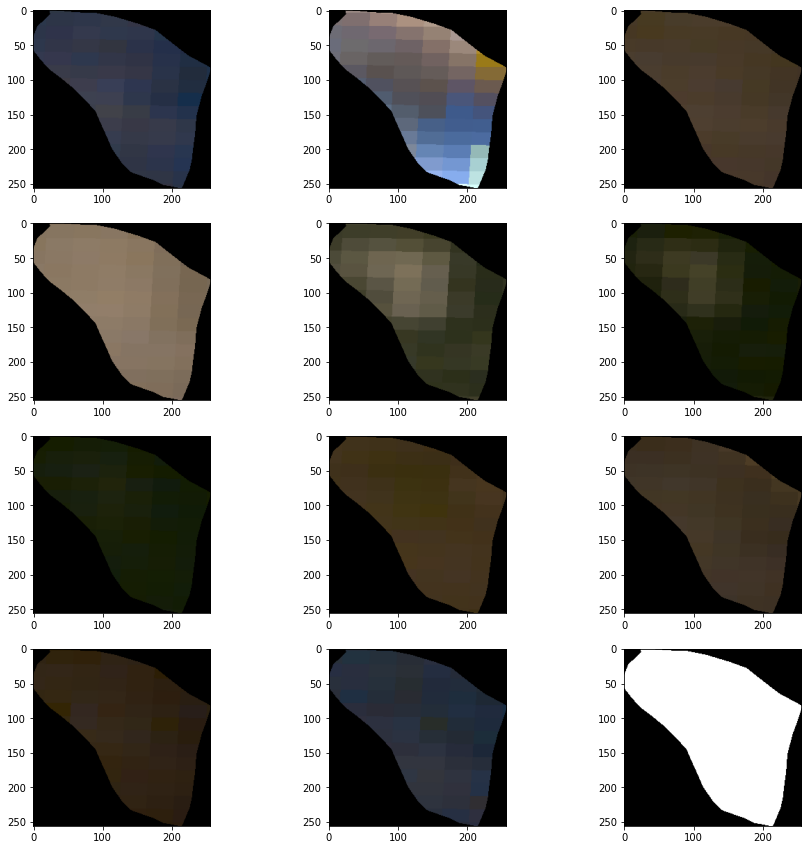

In [63]:
print(imgs[0].shape)

w = h = 15
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 4
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(imgs[i])
plt.show()


In [ ]:
import fiona
import geopandas as gpd
layers = fiona.listlayers('E:/Basisdata_0000_Norge_25833_MatrikkelenEiendomskartTeig_FGDB.gdb')
print(layers)



['matrikkelnummer', 'anleggsprojeksjonsflate', 'anleggsprojeksjonsgrense', 'anleggsprojeksjonspunkt', 'eiendomsgrense', 'hjelpelinje', 'teig_arealmerknad', 'teig', 'teiggrensepunkt']
